<a href="https://colab.research.google.com/github/davidovg/Summer_School_2023/blob/main/GWP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Group Work Project 3 24/05 632 MACHINE LEARNING IN FINANCE

Group no. : 6200
members:


*   Boyan Davidov

*   Ivan Shigolakov

*   Bharat Swami





# Issue 1:

Author: Ivan Shigolakov

## **Technical section**

In this section we will cover the technical issues regarding hyperparameter tuning. The data we are going to use are recruitment data set with different candidates characteristics and target (got a job or not).

In [ ]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Hyperparameter tuning
from sklearn.model_selection import (
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score
)

In [ ]:
data = pd.read_csv("/content/Recruitment_Data.csv")
data.rename(columns={"HiringDecision": "Target"}, inplace=True)
data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,Target
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [ ]:
data.shape

(1500, 11)

In [ ]:
# Defining the features and target
X = data.drop(columns=["Target"], axis=1)
y = data["Target"]

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [ ]:
# Checking the shapes
X_train.shape, X_test.shape

((1200, 10), (300, 10))

In [ ]:
# Standardization
scale = StandardScaler()

# Standardizing the data
X_train_std = pd.DataFrame(
    scale.fit_transform(X_train),
    index=X_train.index,
    columns = X_train.columns
)

X_test_std = pd.DataFrame(
    scale.transform(X_test),
    index = X_test.index,
    columns = X_test.columns
)

In [ ]:
# Checking the SVC model before hyperparameter tuning
model_default = SVC()
model_default.fit(X_train_std, y_train)

y_pred_default = model_default.predict(X_test_std)

#Accuracy
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       211
           1       0.83      0.72      0.77        89

    accuracy                           0.87       300
   macro avg       0.86      0.83      0.84       300
weighted avg       0.87      0.87      0.87       300



We got 87% accuracy on testing dataset. Now let's make hyperparameter tuning.

1. Gread Search

In [ ]:
# Defining parameters range
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

grid = GridSearchCV(
    SVC(),
    params,
    refit = True,
    verbose = 3
)
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.683 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.812 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.842 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.808 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.825 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.800 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.688 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
grid_predictions = grid.predict(X_test_std)

# Classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       211
           1       0.87      0.74      0.80        89

    accuracy                           0.89       300
   macro avg       0.88      0.85      0.86       300
weighted avg       0.89      0.89      0.89       300



As a result of hyperparameter tuning we achieved better results.

2. Random Search

In [ ]:
# Defining parameters range
params_rand = {
    'C': [0.1, 1, 10, 100, 1000],
    "kernel": ["rbf", "poly"],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

grid_rand = RandomizedSearchCV(
    SVC(),
    params_rand,
    refit = True,
    verbose = 3
)
grid_rand.fit(X_train_std, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.842 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.883 total time=   0.1s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly']},
                   verbose=3)

In [ ]:
grid_rand_predictions = grid_rand.predict(X_test_std)

# print classification report
print(classification_report(y_test, grid_rand_predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       211
           1       0.84      0.69      0.75        89

    accuracy                           0.87       300
   macro avg       0.86      0.81      0.83       300
weighted avg       0.86      0.87      0.86       300



Using Random Search method we achieved the same result as Grid Search has.

## **Non-technical section**

Among the machine learning models the most common issue is overfitting. The overfitting is a situation when a ML model has good results on training dataset but bad results on testing data.

In order to handle the issue of overfitting and maintain good scoring results, i.e to reach a generalization, one need to use hyperparameters tuning.

In this section we will use Support Vector Classifier as an example to decribe what hyperparameters this model has and how to choose the right parameters so that to obtain generalization.

First let's enumerate all the parameters that SVC model has (with default states):


- 'C': 1.0,
- 'break_ties': False,
- 'cache_size': 200,
- 'class_weight': None,
- 'coef0': 0.0,
- 'decision_function_shape': ovr,
- 'degree': 3,
- 'gamma': scale,
- 'kernel': rbf,
- 'max_iter': -1,
- 'probability': False,
- 'random_state': None,
- 'shrinking': True,
- 'tol': 0.001,
- 'verbose': False

The most critical hyperparameters for Support Vector Machine Model are kernel, C and gamma.

1. **Hyperparameter 'kernel'**. The 'kernel' function has several different types (linear, poly, radial basis function (rbf), sigmoid and precomputed) and basically it is used to make transformation of training dataset to a higher dimention. The purpose of transformation is to make the data linearly separable. If one can draw a line between classes the linear kernel should be used. If it's impossible to separate classes linearly and we need to use some curve-like separation then a polynomial kernel might be a better choice. Radial basis function (rbf) is better for circulate type data.  
2. **Hyperparameter C**. As have been pointed out in previous group work project the hyperparameter C can help us to achieve the trade-off between the training error and the margin as it determines the penalty for misclassification during the training. As a rule the less the parameter C the larger a margin which is leading to more misclassification on the training data. The situation with low C can be useful when the data points are well-separated and there is not much noise or outliers. But there is a danger in setting parameter C too small as it can lead to underfitting and losses of potetial patterns. Conversely, a large C parameter is leading to training error minimization. This situation can be very useful with not well-separated data points and if there is a presence of noise or outliers. With a high C parameter we can face a problem of overfitting when the SVC model is too specific to the training dataset but has poor results on new data.
3. **Hyperparameter gamma**. The parameter gamma can be treated as a coefficient for radial basis function (rdf), poly and sigmoid. This hyperparameter has a high impact on the model performance. Gamma can take the following values: scale, auto or float. Like the parameter C, gamma parameter is inversely proportional to its distance. The higher the gamma the closer the points considered for the decision boundary. And conversely, the lower the gamma the farther the points that are considered for choosing the decision boundary. There is also another important feature of gamma: the higher the value of gamma the more the decision boundary scope gets closer to the points around it leading to more risk of overfitting and the lower the gamma value the smoother and regular the decision boundary surface gets leading to a less overfitting risk.

The only question one needs to answer is how can we find the optimal hyperparameters? The answer is using hyperparamater tuning techniques. We can point out three tuning methods: grid search, random search and Bayesian optimization.

# Issue 2:

Author: Boyan Davidov

To illustrate the tradeoff between variance it suffices to run a model with increasing complexity and see how the variance/bias changes. We have used here decision tree regression with different depth and random forest.

In [21]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [25]:
# data
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)


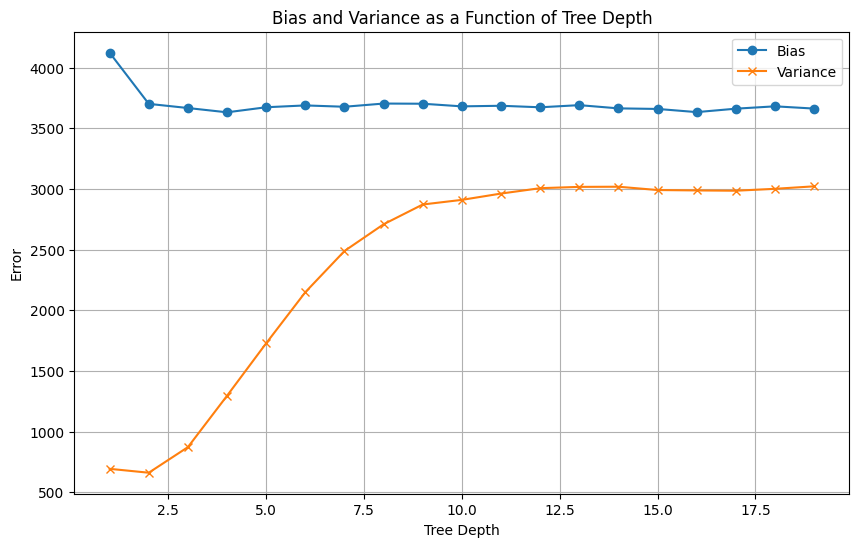

In [ ]:
# depth of tree in a grid
max_depth = list(range(1, 20))
bias_list = []
variance_list = []
depths = []
squared_bias_plus_variance = []

# run model for each depth
for depth in max_depth:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    mse, bias, var = bias_variance_decomp(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        loss="mse",
        num_rounds=200,
        random_seed=1,
    )
    bias_list.append(bias)
    variance_list.append(var)
    squared_bias_plus_variance.append(bias**2 + var)
    depths.append(depth)

# bias and variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(depths, bias_list, label='Bias', marker='o')
plt.plot(depths, variance_list, label='Variance', marker='x')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Bias and Variance as a Function of Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# bias-variance tradeoff plot
scatter = go.Scatter(x=depths, y=squared_bias_plus_variance)
layout = go.Layout(
    title="Bias-Variance Tradeoff",
    xaxis=dict(title="Tree Depth"),
    yaxis=dict(title="Bias^2 + Variance"),
)
fig = go.Figure(data=[scatter], layout=layout)
fig.show()


We can see that at the beginning with a huge bias and variance which then decreases first abruptly as the complexity of the model increases (in terms of tree depth) then around depth of 5, the sum of bias and variance becomes rather stable. This is where the model is optimal and we can hardly decrease bias without increasing variance (or vice-versa). We can say that for tree depth of around 10 we switch from underfitting to overfitting the model.

In [38]:
# data
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=5
)

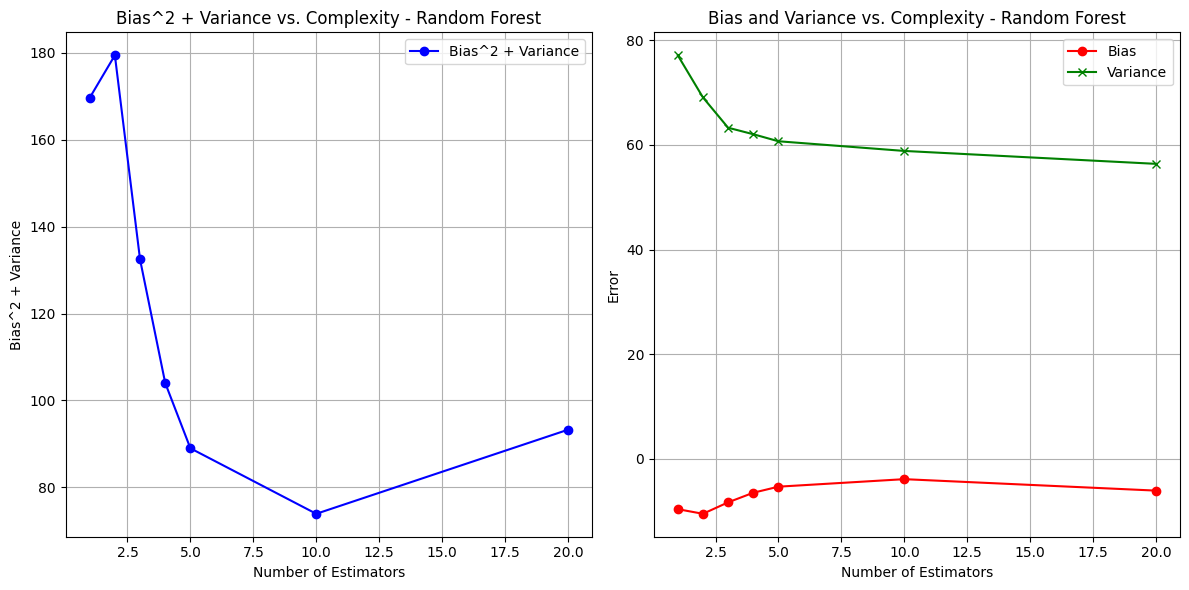

In [41]:
# Grid of parameters
n_estimators_grid = [1,2,3,4,5, 10, 20]
bias_list = []
variance_list = []
squared_bias_plus_variance = []

# Run the model for the grid
for n_estimators in n_estimators_grid:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    bias = np.mean(y_test - y_pred)
    # this is in fact standard deviation but since bias is very small we took the square root of variance to see better the tradeoff
    var = np.var(y_pred)**0.5

    squared_bias_plus_variance.append(bias**2 + var)
    bias_list.append(bias)
    variance_list.append(var)

# bias/variance plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_grid, squared_bias_plus_variance, marker='o', color='blue', label='Bias^2 + Variance')
plt.title('Bias^2 + Variance vs. Complexity - Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Bias^2 + Variance')
plt.grid(True)
plt.legend()

# bias and variance relation
plt.subplot(1, 2, 2)
plt.plot(n_estimators_grid, bias_list, marker='o', color='red', label='Bias')
plt.plot(n_estimators_grid, variance_list, marker='x', color='green', label='Variance')
plt.title('Bias and Variance vs. Complexity - Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In the random forest model the optimal number of estimators is around 10. Note that bias is very small already after 3 estimators but the variance finds its plateau around 10.

# Issue 3: Applying Ensemble Learning- Bagging, Boosting, or Stacking

Author: Bharat Swami

## Bagging

implement bagging using the RandomForestClassifier from the scikit-learn library.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


Load the dataset: We use the Iris dataset which is a standard dataset in scikit-learn.

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

Split the data: The dataset is split into training and testing sets.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Initialize the model: We use RandomForestClassifier from scikit-learn, which is an implementation of bagging.

In [ ]:
# Initialize the RandomForestClassifier
# Random Forest is an example of a bagging ensemble
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, max_features=1),
    n_estimators=10,
    random_state=42
)

Train the model: The model is trained on the training data.

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2, max_features=1),
                  random_state=42)

Make predictions: The model makes predictions on the testing data.

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

Calculate accuracy: The accuracy of the model is calculated and printed.

In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


## Boosting

Using the XGBoost library, to predict the up or down movement of S&P 500 index stocks.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

Load historical data: The code uses yfinance to download historical data for the S&P 500 index.


In [ ]:
# Fetch historical data for S&P 500 index
ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


Create features: We create simple features such as the previous day's closing price and returns.


In [ ]:
# Create features
data['Returns'] = data['Adj Close'].pct_change()
data['Direction'] = np.where(data['Returns'] > 0, 1, 0)
data['Prev Close'] = data['Adj Close'].shift(1)
data['Prev Returns'] = data['Returns'].shift(1)
data.dropna(inplace=True)
data.head(15)

,Open,High,Low,Close,Adj Close,Volume,Returns,Direction,Prev Close,Prev Returns
Date,,,,,,,,,,
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,1,1136.520020,0.003116
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,1,1137.140015,0.000546
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,1,1141.689941,0.004001
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,1,1144.979980,0.002882
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0,1146.979980,0.001747
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,1,1136.219971,-0.009381
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,1,1145.680054,0.008326
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010823,0,1148.459961,0.002426
2010-01-19,1136.030029,1150.449951,1135.770020,1150.229980,1150.229980,4724830000,0.012500,1,1136.030029,-0.010823


Correlation Matrix and Heatmap

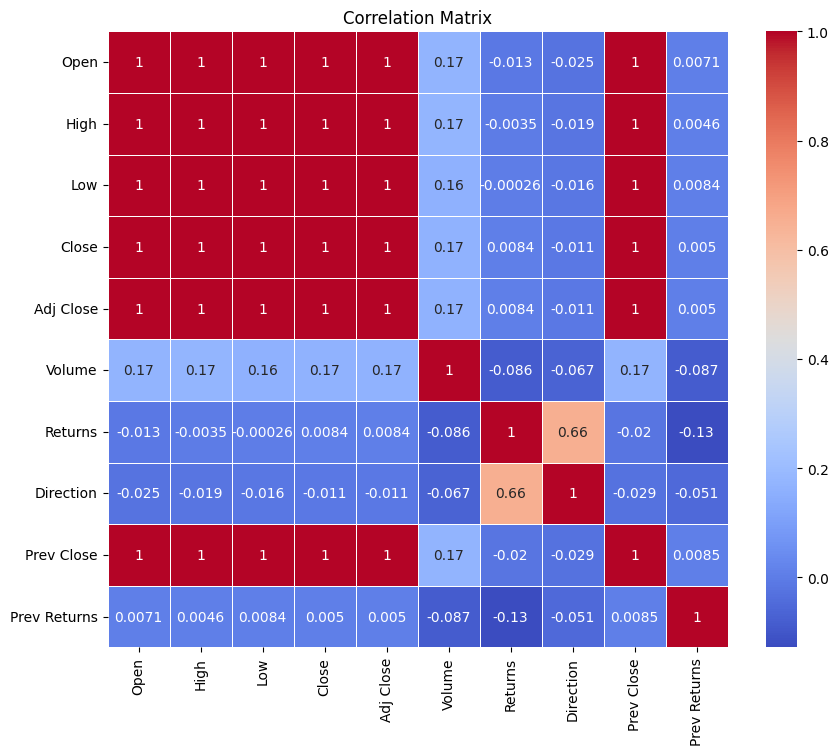

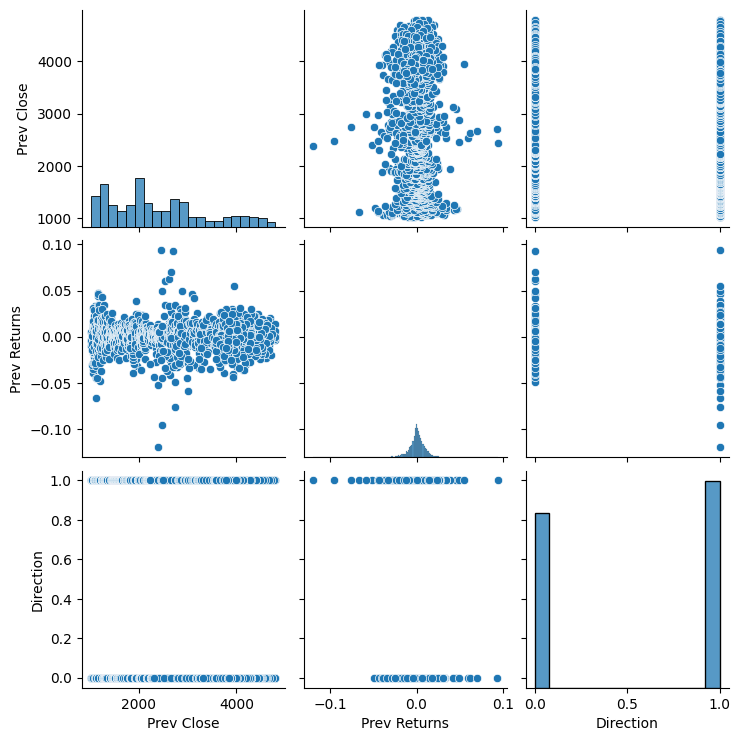

In [ ]:
# Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot to show relationships
sns.pairplot(data[['Prev Close', 'Prev Returns', 'Direction']])
plt.show()

Prepare the data: The feature matrix X and target vector y are created, where y indicates the direction of the movement (1 for up, 0 for down).


In [ ]:
# Prepare the feature matrix X and the target vector y
features = ['Prev Close', 'Prev Returns']
X = data[features]
y = data['Direction']

Split the data: The data is split into training and testing sets.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Initialize the model: The XGBoost classifier is initialized.


In [ ]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

Train the model: The model is trained on the training data.


In [ ]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Make predictions: The model makes predictions on the testing data.


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

Calculate accuracy: The accuracy of the model is calculated and printed.

In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


Graphical represenations

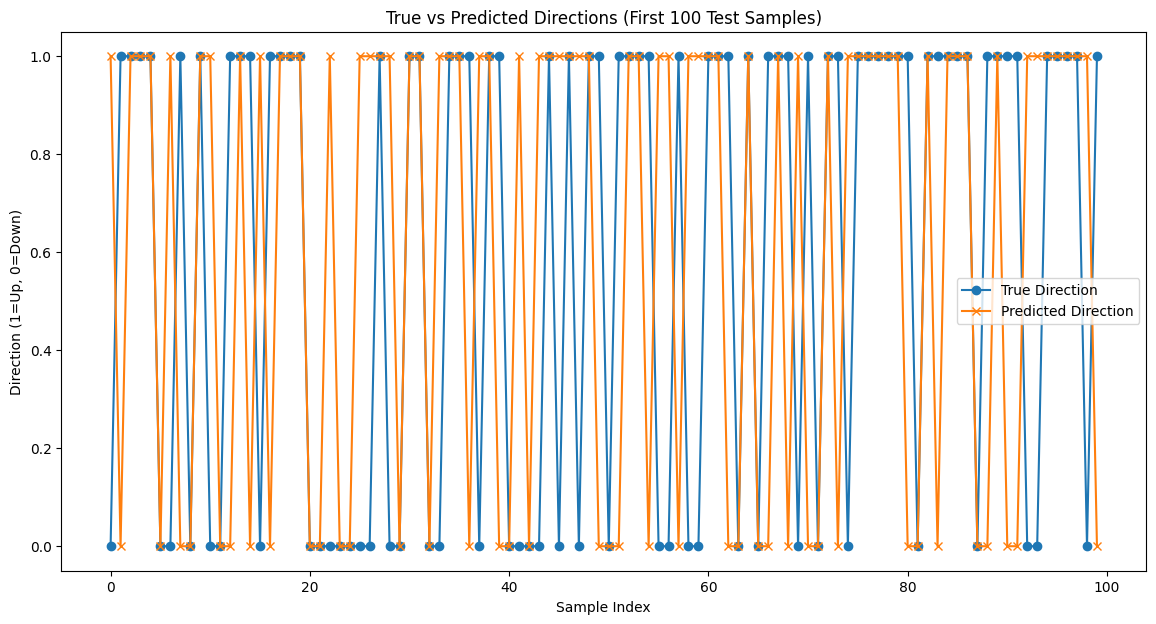

In [ ]:
# Plotting the actual vs. predicted directions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[:100], label='True Direction', marker='o')
plt.plot(y_pred[:100], label='Predicted Direction', marker='x')
plt.legend()
plt.title('True vs Predicted Directions (First 100 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Direction (1=Up, 0=Down)')
plt.show()

<Figure size 1000x600 with 0 Axes>

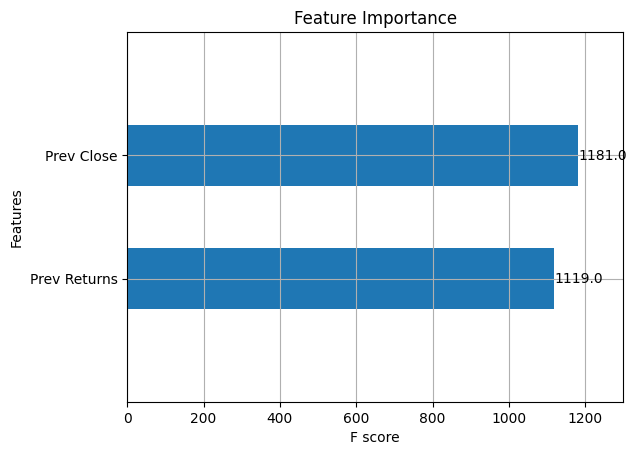

In [ ]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, height=0.5)
plt.title('Feature Importance')
plt.show()

### Hyperparameter Tuning
use GridSearchCV from scikit-learn to perform hyperparameter tuning on the XGBoost model.

Initialize and fit GridSearchCV: We use GridSearchCV to perform a grid search over the hyperparameter grid. This will train multiple models and evaluate them using cross-validation to find the best combination of hyperparameters.


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

Get the best model: After the grid search, we retrieve the best model and its parameters.


In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


Model evaluation: We make predictions using the best model, calculate the accuracy, and print it.


In [ ]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.56


Graphical representation: We plot the true vs. predicted directions and the feature importance as before.

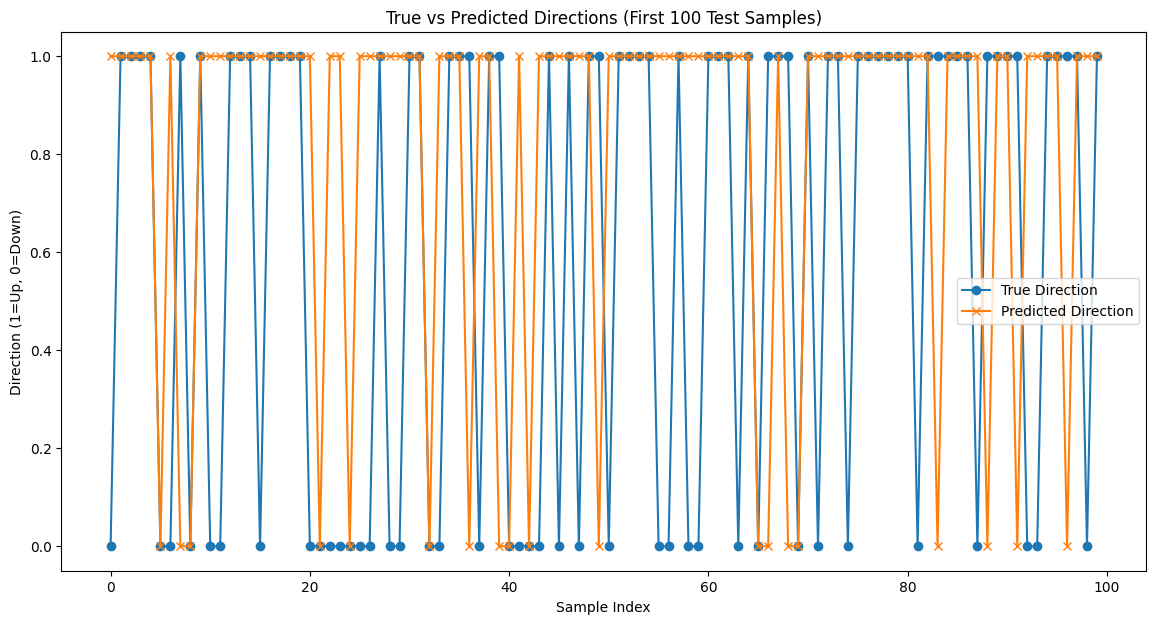

<Figure size 1000x600 with 0 Axes>

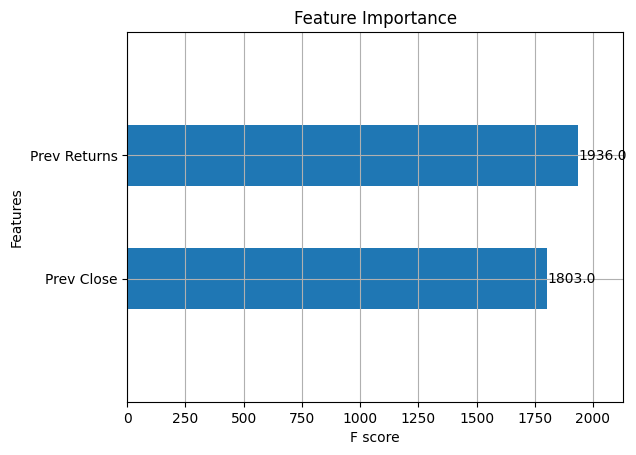

In [ ]:
# Plotting the actual vs. predicted directions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[:100], label='True Direction', marker='o')
plt.plot(y_pred[:100], label='Predicted Direction', marker='x')
plt.legend()
plt.title('True vs Predicted Directions (First 100 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Direction (1=Up, 0=Down)')
plt.show()

# Plotting feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, height=0.5)
plt.title('Feature Importance')
plt.show()

## Stacking

Implementing stacking with hyperparameter tuning for predicting the up and down movements of Nifty50.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Fetching and Preparing Data: We fetch historical data for Nifty50, create features like previous day's close and returns, and calculate the direction (up or down).

In [ ]:
# Fetch historical data for Nifty50 index
ticker = "^NSEI"
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")


[*********************100%%**********************]  1 of 1 completed


In [ ]:

# Create features
data['Returns'] = data['Adj Close'].pct_change()
data['Direction'] = np.where(data['Returns'] > 0, 1, 0)
data['Prev Close'] = data['Adj Close'].shift(1)
data['Prev Returns'] = data['Returns'].shift(1)
data.dropna(inplace=True)
data.head(15)

,Open,High,Low,Close,Adj Close,Volume,Returns,Direction,Prev Close,Prev Returns
Date,,,,,,,,,,
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.000739,1,5277.899902,0.008734
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.003540,0,5281.799805,0.000739
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.003487,0,5263.100098,-0.003540
2010-01-11,5263.799805,5287.200195,5227.799805,5249.399902,5249.399902,0,0.000887,1,5244.750000,-0.003487
2010-01-12,5251.100098,5300.500000,5200.950195,5210.399902,5210.399902,0,-0.007429,0,5249.399902,0.000887
2010-01-13,5212.600098,5239.200195,5169.549805,5233.950195,5233.950195,0,0.004520,1,5210.399902,-0.007429
2010-01-14,5234.500000,5272.850098,5232.500000,5259.899902,5259.899902,0,0.004958,1,5233.950195,0.004520
2010-01-15,5259.899902,5279.850098,5242.450195,5252.200195,5252.200195,0,-0.001464,0,5259.899902,0.004958
2010-01-18,5253.649902,5292.500000,5228.950195,5274.850098,5274.850098,0,0.004312,1,5252.200195,-0.001464


Correlation and Heatmap: We calculate the correlation matrix for the dataset and plot it using seaborn.

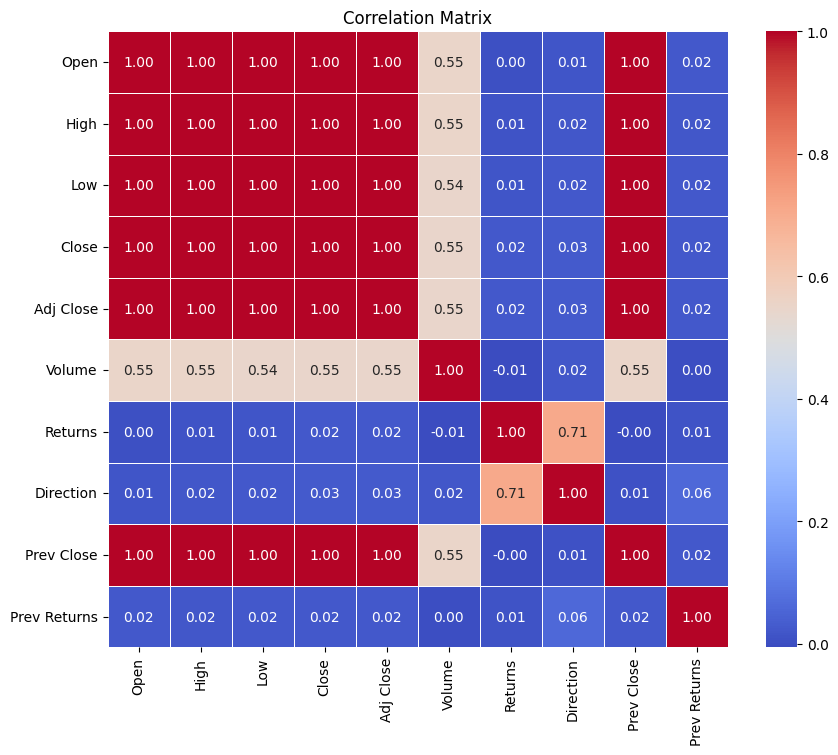

In [ ]:

# Calculate correlation and plot heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Prepare the feature matrix X and the target vector y
features = ['Prev Close', 'Prev Returns']
X = data[features]
y = data['Direction']


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


We define three base models (RandomForestClassifier, LogisticRegression, SVC) and stack them using StackingClassifier.

In [ ]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('svm', SVC(random_state=42, probability=True))
]



In [ ]:
# Define stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())



In [ ]:
# Parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'lr__C': [0.1, 1.0, 10.0],
    'svm__C': [0.1, 1.0, 10.0],
    'svm__kernel': ['linear', 'rbf']
}


We set up a parameter grid for hyperparameter tuning using GridSearchCV.


In [ ]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
librsvg2-bin is already the newest version (2.52.5+dfsg-3ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


FileNotFoundError: Cannot find file: /content/pdfs/20240717_185950_GWP3/GWP3.pdf